In [1]:
import pandas as pd

In [2]:
cn = pd.read_excel('data_cleaning.xlsx','Contracts')
cn

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,No Flex,NaN,NaN,NaN,Monthly Flex,NaN,NaN,NaN,Hourly Flex,NaN,NaN


In [3]:
no_flex = cn.iloc[11,1]

In [4]:
monthly_flex = cn.iloc[11:23,4:6].reset_index(drop=True).rename(columns={'Unnamed: 4':'month','Unnamed: 5':'rate'})

In [5]:
# defining all 3 contracts
hourly_flex = cn.iloc[11:35,8:10].reset_index(drop=True).rename(columns={'Unnamed: 8':'start','Unnamed: 9':'rate'})
hourly_flex[['start','end']] = hourly_flex.start.str.split(' until ', expand=True)
hourly_flex = pd.concat([hourly_flex[['start','end']], hourly_flex['rate']], axis=1)

In [6]:
df = pd.read_excel('data_cleaning.xlsx','Usage',header=None)
df

,0
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh
...,...
8755,_1AM Fri 07th-Nov-2014_0.084 kwh
8756,_6AM 20-May-2014__1.027 kwh
8757,__2 AM Tuesday 8th-Apr-2014___0.052 kwh
8758,9 PM 27th-Jan-2014_1.428 kwh


# Data cleaning

In [7]:
import re

In [8]:
df.rename(columns={ df.columns[0]: "data" }, inplace = True)

In [9]:
df['start'] = [re.search(r'[0-9]{1,2}\s?[AP]M', str(x)).group() for x in df['data']]
df['start'] = [re.sub(r'\s', '', str(x)) for x in df['start']]
df['data'] =  [re.sub(r'[0-9]{1,2}\s?[AP]M','', str(x)) for x in df['data']]
df

,data,start
0,Mon 24th-Mar-2014___0.384 kwh,3PM
1,15-Aug-2014___1.201 kwh,5AM
2,__ Thu 20-Mar-2014____1.523 kwh,8PM
3,23rd-Apr-2014___0.424 kwh,6PM
4,_ Friday 19th-Dec-2014___0.209 kwh,1AM
...,...,...
8755,_ Fri 07th-Nov-2014_0.084 kwh,1AM
8756,_ 20-May-2014__1.027 kwh,6AM
8757,__ Tuesday 8th-Apr-2014___0.052 kwh,2AM
8758,27th-Jan-2014_1.428 kwh,9PM


In [10]:
df[['start']].sort_values('start').start.unique()

array(['10AM', '10PM', '11AM', '11PM', '12AM', '12PM', '1AM', '1PM',
       '2AM', '2PM', '3AM', '3PM', '4AM', '4PM', '5AM', '5PM', '6AM',
       '6PM', '7AM', '7PM', '8AM', '8PM', '9AM', '9PM'], dtype=object)

In [11]:
df['data'] = [re.sub(r'\s', '', str(x)) for x in df['data']]

In [12]:
df['kwh'] = [re.search(r'[0-9].[0-9]{2,3}kwh', str(x)).group() for x in df['data']]
df['kwh'] = [re.sub(r'kwh', '', str(x)) for x in df['kwh']]
df['data'] =  [re.sub(r'[0-9].[0-9]{2,3}kwh','', str(x)) for x in df['data']]
df

,data,start,kwh
0,Mon24th-Mar-2014___,3PM,0.384
1,15-Aug-2014___,5AM,1.201
2,__Thu20-Mar-2014____,8PM,1.523
3,23rd-Apr-2014___,6PM,0.424
4,_Friday19th-Dec-2014___,1AM,0.209
...,...,...,...
8755,_Fri07th-Nov-2014_,1AM,0.084
8756,_20-May-2014__,6AM,1.027
8757,__Tuesday8th-Apr-2014___,2AM,0.052
8758,27th-Jan-2014_,9PM,1.428


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    8760 non-null   object
 1   start   8760 non-null   object
 2   kwh     8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


In [14]:
df = df.astype({"kwh": 'float64'})

In [15]:
df.describe()

,kwh
count,8760.000000
mean,0.781748
std,0.759519
min,0.048000
25%,0.282000
50%,0.523000
75%,0.994500
max,5.141000


In [16]:
df.head(3)

,data,start,kwh
0,Mon24th-Mar-2014___,3PM,0.384
1,15-Aug-2014___,5AM,1.201
2,__Thu20-Mar-2014____,8PM,1.523


In [17]:
df['date'] = [re.search(r'[0-9].+4', str(x)).group() for x in df['data']]
df.drop('data',axis=1,inplace=True)
df

,start,kwh,date
0,3PM,0.384,24th-Mar-2014
1,5AM,1.201,15-Aug-2014
2,8PM,1.523,20-Mar-2014
3,6PM,0.424,23rd-Apr-2014
4,1AM,0.209,19th-Dec-2014
...,...,...,...
8755,1AM,0.084,07th-Nov-2014
8756,6AM,1.027,20-May-2014
8757,2AM,0.052,8th-Apr-2014
8758,9PM,1.428,27th-Jan-2014


In [18]:
df['date'] = [re.sub(r'th', '', str(x)) for x in df['date']]
df['date'] = [re.sub(r'rd', '', str(x)) for x in df['date']]
df['date'] = [re.sub(r'nd', '', str(x)) for x in df['date']]
df['date'] = [re.sub(r'st', '', str(x)) for x in df['date']]
df

,start,kwh,date
0,3PM,0.384,24-Mar-2014
1,5AM,1.201,15-Aug-2014
2,8PM,1.523,20-Mar-2014
3,6PM,0.424,23-Apr-2014
4,1AM,0.209,19-Dec-2014
...,...,...,...
8755,1AM,0.084,07-Nov-2014
8756,6AM,1.027,20-May-2014
8757,2AM,0.052,8-Apr-2014
8758,9PM,1.428,27-Jan-2014


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   8760 non-null   object 
 1   kwh     8760 non-null   float64
 2   date    8760 non-null   object 
dtypes: float64(1), object(2)
memory usage: 205.4+ KB


In [20]:
df['date'] = pd.to_datetime(df['date'])
df

,start,kwh,date
0,3PM,0.384,2014-03-24
1,5AM,1.201,2014-08-15
2,8PM,1.523,2014-03-20
3,6PM,0.424,2014-04-23
4,1AM,0.209,2014-12-19
...,...,...,...
8755,1AM,0.084,2014-11-07
8756,6AM,1.027,2014-05-20
8757,2AM,0.052,2014-04-08
8758,9PM,1.428,2014-01-27


In [21]:
df['weekday'] = df['date'].dt.dayofweek
df

,start,kwh,date,weekday
0,3PM,0.384,2014-03-24,0
1,5AM,1.201,2014-08-15,4
2,8PM,1.523,2014-03-20,3
3,6PM,0.424,2014-04-23,2
4,1AM,0.209,2014-12-19,4
...,...,...,...,...
8755,1AM,0.084,2014-11-07,4
8756,6AM,1.027,2014-05-20,1
8757,2AM,0.052,2014-04-08,1
8758,9PM,1.428,2014-01-27,0


In [22]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['weekday'].map(days)
df

,start,kwh,date,weekday
0,3PM,0.384,2014-03-24,Monday
1,5AM,1.201,2014-08-15,Friday
2,8PM,1.523,2014-03-20,Thursday
3,6PM,0.424,2014-04-23,Wednesday
4,1AM,0.209,2014-12-19,Friday
...,...,...,...,...
8755,1AM,0.084,2014-11-07,Friday
8756,6AM,1.027,2014-05-20,Tuesday
8757,2AM,0.052,2014-04-08,Tuesday
8758,9PM,1.428,2014-01-27,Monday


In [23]:
df['weekday'].unique()

array(['Monday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Saturday',
       'Sunday'], dtype=object)

In [24]:
df['hour'] = [re.sub(r'[A-Z]', '', str(x)) for x in df['start']]
df['daytime'] = [re.sub(r'[0-9]', '', str(x)) for x in df['start']]
df

,start,kwh,date,weekday,hour,daytime
0,3PM,0.384,2014-03-24,Monday,3,PM
1,5AM,1.201,2014-08-15,Friday,5,AM
2,8PM,1.523,2014-03-20,Thursday,8,PM
3,6PM,0.424,2014-04-23,Wednesday,6,PM
4,1AM,0.209,2014-12-19,Friday,1,AM
...,...,...,...,...,...,...
8755,1AM,0.084,2014-11-07,Friday,1,AM
8756,6AM,1.027,2014-05-20,Tuesday,6,AM
8757,2AM,0.052,2014-04-08,Tuesday,2,AM
8758,9PM,1.428,2014-01-27,Monday,9,PM


In [25]:
df = df.astype({"hour": 'int'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   start    8760 non-null   object        
 1   kwh      8760 non-null   float64       
 2   date     8760 non-null   datetime64[ns]
 3   weekday  8760 non-null   object        
 4   hour     8760 non-null   int32         
 5   daytime  8760 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 376.5+ KB


In [27]:
df['month'] = df['date'].dt.month_name()
df

,start,kwh,date,weekday,hour,daytime,month
0,3PM,0.384,2014-03-24,Monday,3,PM,March
1,5AM,1.201,2014-08-15,Friday,5,AM,August
2,8PM,1.523,2014-03-20,Thursday,8,PM,March
3,6PM,0.424,2014-04-23,Wednesday,6,PM,April
4,1AM,0.209,2014-12-19,Friday,1,AM,December
...,...,...,...,...,...,...,...
8755,1AM,0.084,2014-11-07,Friday,1,AM,November
8756,6AM,1.027,2014-05-20,Tuesday,6,AM,May
8757,2AM,0.052,2014-04-08,Tuesday,2,AM,April
8758,9PM,1.428,2014-01-27,Monday,9,PM,January


In [28]:
pd.concat(g for _, g in df.groupby(['date','start']) if len(g) > 1) #duplicate dates and times

,start,kwh,date,weekday,hour,daytime,month
2,8PM,1.523,2014-03-20,Thursday,8,PM,March
16,8PM,1.523,2014-03-20,Thursday,8,PM,March
14,4PM,0.384,2014-03-24,Monday,4,PM,March
7676,4PM,0.365,2014-03-24,Monday,4,PM,March
3,6PM,0.424,2014-04-23,Wednesday,6,PM,April
17,6PM,0.424,2014-04-23,Wednesday,6,PM,April
6,12PM,1.296,2014-07-07,Monday,12,PM,July
20,12PM,1.296,2014-07-07,Monday,12,PM,July
1,5AM,1.201,2014-08-15,Friday,5,AM,August
15,5AM,1.201,2014-08-15,Friday,5,AM,August


In [29]:
df.drop_duplicates(inplace=True)

# Questions

### Question 1
### What is your average hourly electricity usage?
#### a. 0.641kWh     b. 0.782kWh     c. 0.884kWh     d. 0.937kWh

In [30]:
print(round(df['kwh'].mean(),3),'kWh')

0.782 kWh


### Question 2
### What is your average electricity usageperhour in February?
#### a.0.760kWh   b. 0.784kWh   c. 0.808kWh   d. 0.834kWh

In [31]:
print(round(df[df['date'].dt.month == 2]['kwh'].mean(),3),'kWh')

0.834 kWh


### Question 3
### Which day of the week has the highestaverage usage?
#### a.Sunday     b. Monday      c. Tuesday       d. Wednesday

In [32]:
df.groupby('weekday').mean()[df.groupby('weekday').mean()['kwh'] == df.groupby('weekday').mean()['kwh'].max()]

,kwh,hour
weekday,,
Sunday,0.898601,6.496391


### Question 4
### What is the highest amount of electricityused in a continuous 4 hour period?
#### a. 17.237kWh       b. 17.327kWh       c. 17.422kWh         d. 17.487kWh

In [33]:
round(df.sort_values(['date','daytime','hour'])['kwh'].rolling(min_periods=4, window=4).sum().max(),3)

17.237

### Question 5
#### Based on your historic electricity usage, what would your annual cost of electricity be under the "Monthly Flex" contract?
#### a. 1350.73   b. 1420.06     c. 1450.26   d. 1493.77

In [34]:
m_f = pd.merge(df, monthly_flex, how="left")
m_f['total'] = m_f['kwh'] * m_f['rate']
round(m_f.total.sum(),2)

1420.06

### Question 6
#### Based on your historic electricity usage, which of the three contracts would pro- duce the lowest annual cost?
#### a.The No Flex plan        b. The Monthly Flex plan         c. The Hourly Flex plan        d. Impossible to Determine

In [35]:
n_f = df
n_f['total'] = n_f['kwh'] * no_flex
print('The No Flex plan annual cost:', round(n_f.total.sum(),2))

print('The Monthly Flex plan annual cost:', round(m_f.total.sum(),2))

h_f = pd.merge(df, hourly_flex, how="left")
h_f['total'] = h_f['kwh'] * h_f['rate']
print('The Hourly Flex plan annual cost:', round(h_f.total.sum(),2))

The No Flex plan annual cost: 1436.87
The Monthly Flex plan annual cost: 1420.06
The Hourly Flex plan annual cost: 1367.85


# Summary: The Hourly Flex contract would produce lowest annual cost.

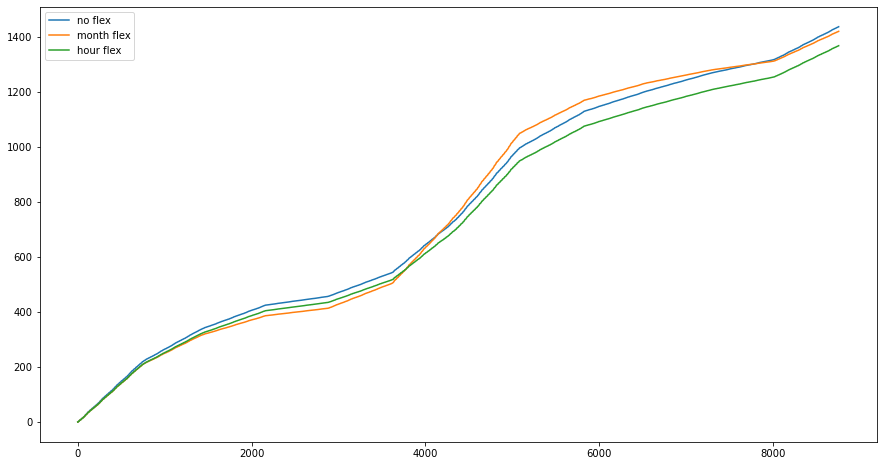

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

n_f = n_f.sort_values(['date','daytime','hour']).reset_index(drop=True)
n_f['no flex'] = n_f['total'].rolling(min_periods=1, window=10000).sum()
x1 = pd.Series(n_f['no flex'])

m_f = m_f.sort_values(['date','daytime','hour']).reset_index(drop=True)
m_f['month flex'] = m_f['total'].rolling(min_periods=1, window=10000).sum()
x2 = pd.Series(m_f['month flex'])

h_f = h_f.sort_values(['date','daytime','hour']).reset_index(drop=True)
h_f['hour flex'] = h_f['total'].rolling(min_periods=1, window=10000).sum()
x3 = pd.Series(h_f['hour flex'])

axes = plt.gca()
x1.plot()
x2.plot()
x3.plot()
axes.legend()
plt.show()